# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 0 for FSO
filtered_data_RFL = data_RFL[data_RFL['SYNOPCode'] == 0]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_0,sin_time,cos_time
0,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939,1,0.707107,-0.707107
1,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393,1,0.707107,-0.707107
2,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809,1,0.500000,-0.866025
3,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951,1,0.500000,-0.866025
4,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052,1,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000,1,0.866025,0.500000
91375,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834,1,0.866025,0.500000
91376,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824,1,0.866025,0.500000
91377,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146,1,0.965926,0.258819


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000253782E3650>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000253782E2A50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000253782E3010>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025376431E10>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9700264709400255


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
13               sin_time  0.420840  0.972777                   12
16               cos_time  0.424774  0.972265                    9
12         TemperatureMax  0.425103  0.972222                   13
9               WindSpeed  0.426406  0.972052                   16
8            WindSpeedMin  0.426594  0.972027                   17
10  TemperatureDifference  0.426872  0.971991                   15
1        RainIntensityMax  0.428101  0.971829                   24
2        RainIntensityMin  0.428435  0.971785                   23
15          VisibilityMax  0.428469  0.971781                   10
6             Particulate  0.428608  0.971762                   19
5          ParticulateMax  0.428646  0.971757                   20
4          ParticulateMin  0.428668  0.971754                   21
0           RainIntensity  0.428726  0.971747                   25
3             SYNOPCode_0  0.429082  0.971700                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
13,sin_time,0.420840,0.972777,12
16,cos_time,0.424774,0.972265,9
12,TemperatureMax,0.425103,0.972222,13
9,WindSpeed,0.426406,0.972052,16
8,WindSpeedMin,0.426594,0.972027,17
10,TemperatureDifference,0.426872,0.971991,15
1,RainIntensityMax,0.428101,0.971829,24
2,RainIntensityMin,0.428435,0.971785,23
15,VisibilityMax,0.428469,0.971781,10
6,Particulate,0.428608,0.971762,19


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_20796\4031568339.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


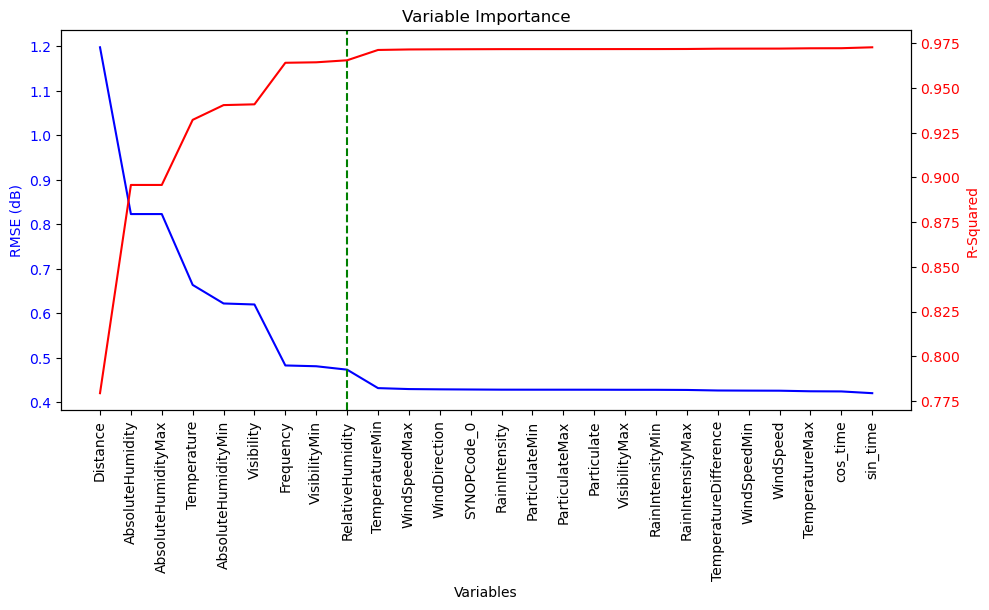

In [7]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 8
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [8]:
selected_features_RFL= [
    'cos_time',
    'Frequency',
    'VisibilityMin',
    'Visibility',
    'Temperature',
    'AbsoluteHumidityMin',
    'AbsoluteHumidityMax',
    'AbsoluteHumidity',
    'Distance'
]

In [9]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.4476490236545652
Test R^2: 0.9696405633266434


# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

# Filter the DataFrame to include only rows where 'SYNOPCode' == 0 for FSO
filtered_data_FSO = data_FSO[data_FSO['SYNOPCode'] == 0]

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,Visibility,VisibilityMax,VisibilityMin,WindDirection,WindSpeed,WindSpeedMax,WindSpeedMin,SYNOPCode_0,sin_time,cos_time
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,65884.518460,72336.362233,65617.543754,88.755450,3.057066,6.863808,3.007939,1,0.707107,-0.707107
1,7.451176,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,64963.410920,68753.386153,60379.327485,99.790057,2.727910,6.468903,2.537393,1,0.707107,-0.707107
2,7.072747,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,54794.281070,54821.773817,50850.155963,65.730085,1.674810,2.826916,1.640809,1,0.500000,-0.866025
3,6.949288,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,50205.641590,52519.927530,45374.510898,88.127497,0.962068,2.780643,0.886951,1,0.500000,-0.866025
4,7.361052,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,59038.325990,64418.329138,54461.246506,84.167414,1.881007,4.476298,1.874052,1,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,13041.847800,13458.340663,12411.852994,91.391749,0.000000,0.027596,0.000000,1,0.866025,0.500000
91375,9.333777,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,15959.633590,16232.735439,15345.485232,47.997946,0.075640,0.349551,0.069834,1,0.866025,0.500000
91376,8.873168,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,13129.663750,13948.560177,11925.979953,103.963102,0.052282,0.178062,0.049824,1,0.866025,0.500000
91377,9.538886,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,15082.787860,15522.762221,14842.654291,82.090779,0.443520,1.838449,0.413146,1,0.965926,0.258819


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002530635F490>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002537FCB7CD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002537FCB6210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002537FC5F810>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9159827454047196


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
9             Particulate  0.985604  0.921290                   16
10           WindSpeedMax  0.985614  0.921289                   15
6          ParticulateMax  0.988351  0.920851                   19
7               WindSpeed  0.988453  0.920834                   18
8     AbsoluteHumidityMin  0.988526  0.920823                   17
11               sin_time  0.989275  0.920703                   14
5           WindDirection  0.992478  0.920188                   20
2        RainIntensityMin  0.992675  0.920157                   23
0           RainIntensity  0.992785  0.920139                   25
3             SYNOPCode_0  0.992802  0.920136                   22
4               Frequency  0.993057  0.920095                   21
1        RainIntensityMax  0.993099  0.920089                   24
12         ParticulateMin  1.015135  0.916503                   13
14               cos_time  1.047384  0.911113                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
9,Particulate,0.985604,0.921290,16
10,WindSpeedMax,0.985614,0.921289,15
6,ParticulateMax,0.988351,0.920851,19
7,WindSpeed,0.988453,0.920834,18
8,AbsoluteHumidityMin,0.988526,0.920823,17
11,sin_time,0.989275,0.920703,14
5,WindDirection,0.992478,0.920188,20
2,RainIntensityMin,0.992675,0.920157,23
0,RainIntensity,0.992785,0.920139,25
3,SYNOPCode_0,0.992802,0.920136,22


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_20796\1637131890.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


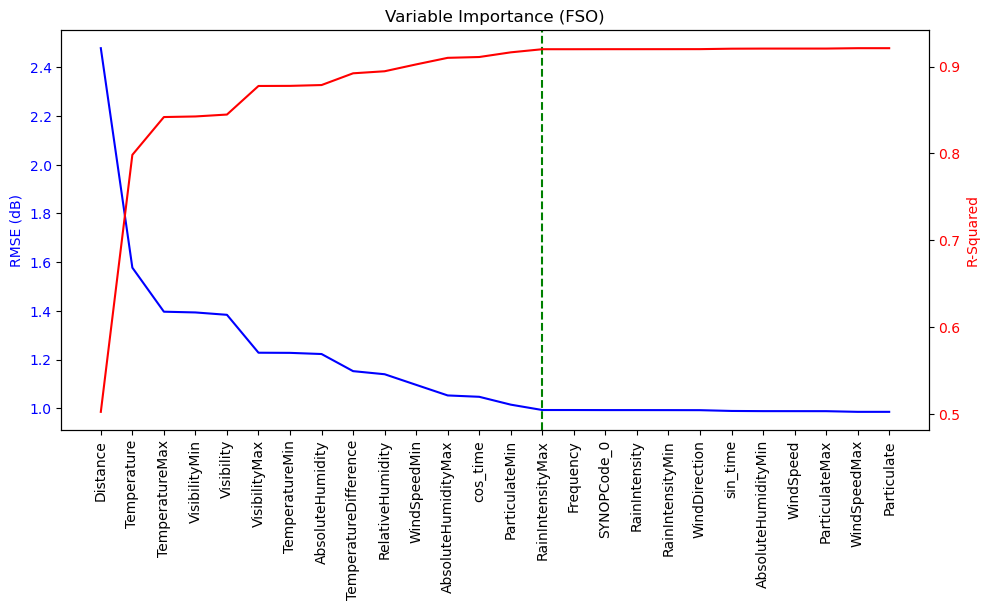

In [17]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')

ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 14
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance (FSO)')
plt.show()


In [18]:
selected_features_FSO = [
    'RainIntensityMax',
    'ParticulateMin',
    'cos_time',
    'AbsoluteHumidityMax',
    'WindSpeedMin',
    'RelativeHumidity',
    'TemperatureDifference',
    'Visibility',
    'AbsoluteHumidity',
    'TemperatureMin',
    'VisibilityMax',
    'VisibilityMin',
    'TemperatureMax',
    'Temperature',
    'Distance'
]


In [19]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=14,
    min_samples_leaf=9,
    min_samples_split=2,
    n_estimators=158,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=14, min_samples_leaf=9, n_estimators=158,
                      oob_score=True, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 1.0097752389297017
Test R^2: 0.9186148240233967


# Plot

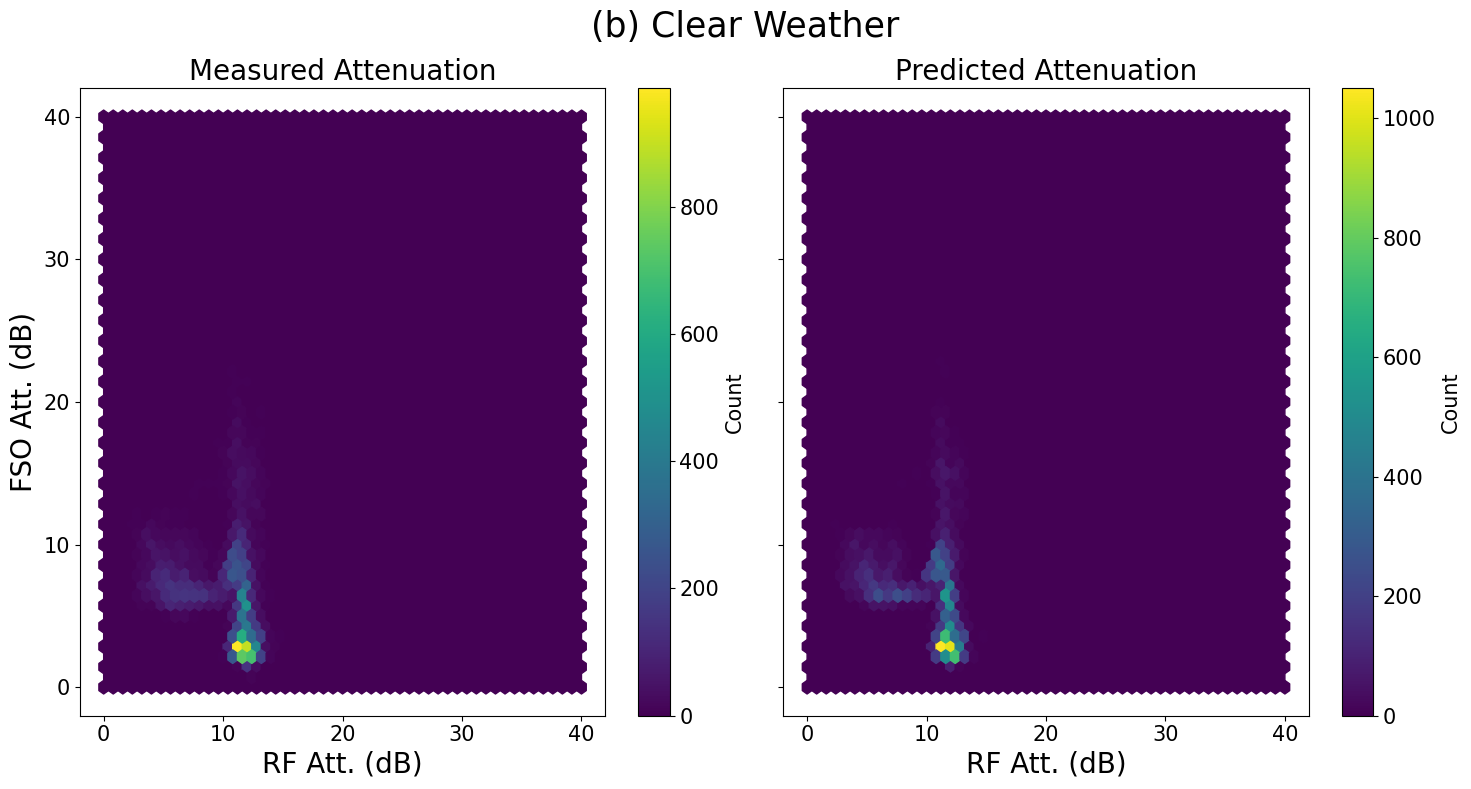

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(b) Clear Weather',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_20796\2224336256.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_20796\2224336256.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


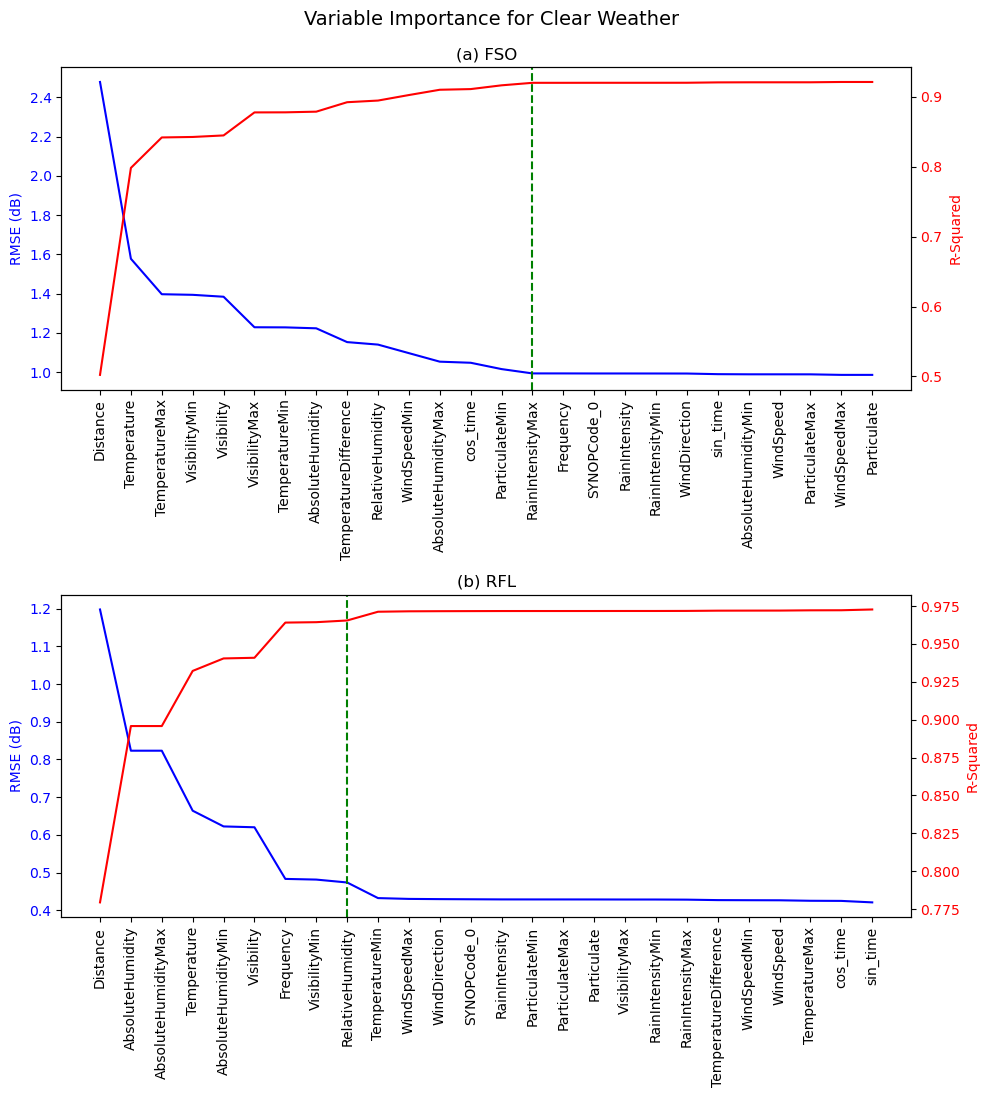

In [22]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 14  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 8  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Clear Weather ', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


# Method 2 (RFL)

## train

In [25]:
# Continue from where you've trained the final model on RFL data
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

# Generate Predicted RFL Attenuation on the training data
predicted_FSO_train_2 = final_model_FSO.predict(X_train_selected_FSO)
X_train_RFL['Predicted_FSO_Att_2'] = predicted_FSO_train_2  # Enhance the FSO training dataset

# Use final_model_FSO to predict FSO attenuation on the test data
predicted_FSO_test_2 = final_model_FSO.predict(X_test_selected_FSO)
X_test_RFL['Predicted_FSO_Att_2'] = predicted_FSO_test_2


# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_RFL_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_RFL_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_RFL_2 = RandomizedSearchCV(
    estimator=rf_RFL_2,
    param_distributions=param_distributions_RFL_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for FSO
random_search_RFL_2.fit(X_train_RFL, y_train_RFL)  

# Retrieve and apply the best hyperparameters
best_params_RFL_2 = random_search_RFL_2.best_params_
best_score_RFL_2 = random_search_RFL_2.best_score_
print(f"Best hyperparameters for RFL: {best_params_RFL_2}")
print(f"Best OOB score from RandomizedSearchCV for RFL: {best_score_RFL_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for RFL: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for RFL: 0.9702639552096997


In [32]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL_2 = pd.DataFrame(X_train_RFL, columns=X_train_RFL.columns)
train_df_RFL_2['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL_2= rank_variables_oob(train_df_RFL_2, 'RFL_Att', best_params_RFL_2)
print(rankings_table_RFL_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
9               WindSpeed  0.425237  0.972205                   17
10  TemperatureDifference  0.426060  0.972097                   16
8           WindDirection  0.427393  0.971922                   18
4             Particulate  0.427451  0.971915                   22
5          ParticulateMax  0.427561  0.971900                   21
0           RainIntensity  0.427638  0.971890                   26
7            WindSpeedMin  0.427763  0.971873                   19
2        RainIntensityMin  0.427928  0.971852                   24
6          ParticulateMin  0.427970  0.971846                   20
3             SYNOPCode_0  0.428007  0.971841                   23
1        RainIntensityMax  0.428142  0.971824                   25
11               cos_time  0.429400  0.971658                   15
14               sin_time  0.434022  0.971044                   12
13          VisibilityMax  0.435225  0.970884                 

In [33]:
rankings_table_RFL_2

,Removed Variable,RSMSE,R^2,Remaining Variables
9,WindSpeed,0.425237,0.972205,17
10,TemperatureDifference,0.426060,0.972097,16
8,WindDirection,0.427393,0.971922,18
4,Particulate,0.427451,0.971915,22
5,ParticulateMax,0.427561,0.971900,21
0,RainIntensity,0.427638,0.971890,26
7,WindSpeedMin,0.427763,0.971873,19
2,RainIntensityMin,0.427928,0.971852,24
6,ParticulateMin,0.427970,0.971846,20
3,SYNOPCode_0,0.428007,0.971841,23


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_20796\3706510421.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


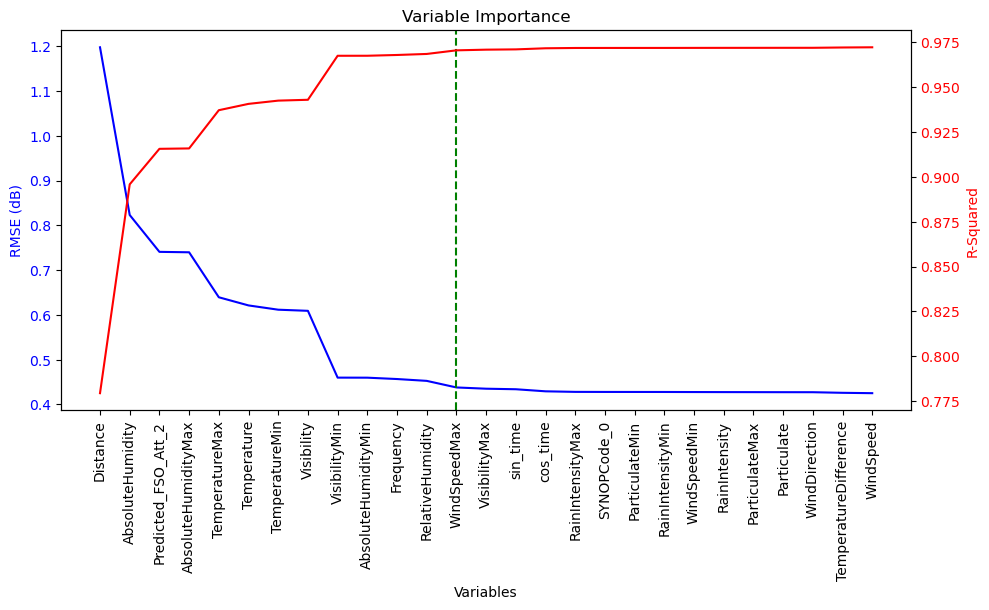

In [38]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL_2 = rankings_table_RFL_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 12
cutoff_variable = rankings_table_sorted_RFL_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [39]:
selected_features_RFL_2= [
    
    'WindSpeedMax',
    'RelativeHumidity',
    'Frequency',
    'AbsoluteHumidityMin',
    'VisibilityMin',
    'Visibility',
    'TemperatureMin',
    'Temperature',
    'TemperatureMax',
    'AbsoluteHumidityMax',
    'Predicted_FSO_Att_2',
    'AbsoluteHumidity',
    'Distance'
   
]
# Select only the chosen features for training and testing
X_train_selected_RFL_2 = X_train_RFL[selected_features_RFL_2]
X_test_selected_RFL_2 = X_test_RFL[selected_features_RFL_2]


## Testing

In [40]:
final_model_RFL_2 = RandomForestRegressor(
    n_estimators=best_params_RFL_2['n_estimators'],
    max_depth=best_params_RFL_2['max_depth'],
    min_samples_split=best_params_RFL_2['min_samples_split'],
    min_samples_leaf=best_params_RFL_2['min_samples_leaf'],
    bootstrap=best_params_RFL_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_RFL_2.fit(X_train_selected_RFL_2, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [41]:

# Now, predict RFL on the enhanced test data
predicted_RFL_test_2 = final_model_RFL_2.predict(X_test_selected_RFL_2)

# Calculate RMSE and R^2 for the test data to evaluate the RFL model
test_rmse_RFL_2 = mean_squared_error(y_test_RFL, predicted_RFL_test_2, squared=False)
test_r2_RFL_2 = r2_score(y_test_RFL, predicted_RFL_test_2)

print(f"Test RMSE for RFL: {test_rmse_RFL_2}")
print(f"Test R^2 for RFL: {test_r2_RFL_2}")


Test RMSE for RFL: 0.4448505178832367
Test R^2 for RFL: 0.9700189646392442


# Method 3 (FSO)

## train

In [28]:
# Continue from where you've trained the final model on RFL data
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

# Generate Predicted RFL Attenuation on the training data
predicted_RFL_train_2 = final_model_RFL.predict(X_train_selected_RFL)
X_train_FSO['Predicted_RFL_Att_2'] = predicted_RFL_train_2  
# Use final_model_RFL to predict RFL attenuation on the test data
predicted_RFL_test_2 = final_model_RFL.predict(X_test_selected_RFL)
# Enhance the FSO test dataset with these predictions
X_test_FSO['Predicted_RFL_Att_2'] = predicted_RFL_test_2

# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_FSO_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_FSO_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_FSO_2 = RandomizedSearchCV(
    estimator=rf_FSO_2,
    param_distributions=param_distributions_FSO_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for RFL
random_search_FSO_2.fit(X_train_FSO, y_train_FSO)  # Note: Using X_train_RFL not X_train_FSO

# Retrieve and apply the best hyperparameters
best_params_FSO_2 = random_search_FSO_2.best_params_
best_score_FSO_2 = random_search_FSO_2.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO_2}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 158}
Best OOB score from RandomizedSearchCV for FSO: 0.911418268058766


In [35]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO_2 = pd.DataFrame(X_train_FSO, columns=X_train_FSO.columns)
train_df_FSO_2['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO_2 = rank_variables_oob(train_df_FSO_2, 'FSO_Att', best_params_FSO_2)
print(rankings_table_FSO_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
10           WindSpeedMax  1.013850  0.916714                   16
8          ParticulateMin  1.016319  0.916308                   18
7               WindSpeed  1.016401  0.916294                   19
9     AbsoluteHumidityMax  1.016526  0.916274                   17
6          ParticulateMax  1.016818  0.916226                   20
5           WindDirection  1.019038  0.915859                   21
11               cos_time  1.019041  0.915859                   15
2        RainIntensityMin  1.019163  0.915839                   24
0           RainIntensity  1.019259  0.915823                   26
4               Frequency  1.019272  0.915821                   22
3             SYNOPCode_0  1.019343  0.915809                   23
1        RainIntensityMax  1.019407  0.915799                   25
13            Particulate  1.037091  0.912852                   13
12    AbsoluteHumidityMin  1.040272  0.912316                 

In [36]:
rankings_table_FSO_2

,Removed Variable,RSMSE,R^2,Remaining Variables
10,WindSpeedMax,1.013850,0.916714,16
8,ParticulateMin,1.016319,0.916308,18
7,WindSpeed,1.016401,0.916294,19
9,AbsoluteHumidityMax,1.016526,0.916274,17
6,ParticulateMax,1.016818,0.916226,20
5,WindDirection,1.019038,0.915859,21
11,cos_time,1.019041,0.915859,15
2,RainIntensityMin,1.019163,0.915839,24
0,RainIntensity,1.019259,0.915823,26
4,Frequency,1.019272,0.915821,22


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_20796\1579591408.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)


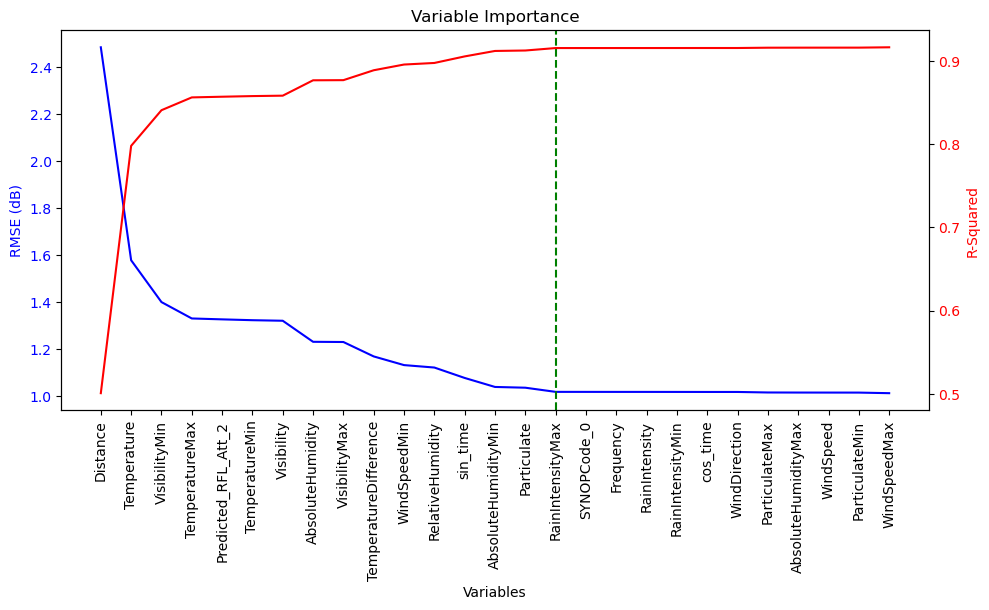

In [44]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO_2 = rankings_table_FSO_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_FSO_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [45]:
selected_features_FSO_2 = [
    
    'RainIntensityMax',
    'Particulate',
    'AbsoluteHumidityMin',
    'sin_time',
    'RelativeHumidity',
    'WindSpeedMin',
    'TemperatureDifference',
    'VisibilityMax',
    'AbsoluteHumidity',
    'Visibility',
    'TemperatureMin',
    'Predicted_RFL_Att_2',
    'TemperatureMax',
    'VisibilityMin',
    'Temperature',
    'Distance'
    
  
]
# Select only the chosen features for training and testing
X_train_selected_FSO_2 = X_train_FSO[selected_features_FSO_2]
X_test_selected_FSO_2 = X_test_FSO[selected_features_FSO_2]


In [46]:
final_model_FSO_2 = RandomForestRegressor(
    n_estimators=best_params_FSO_2['n_estimators'],
    max_depth=best_params_FSO_2['max_depth'],
    min_samples_split=best_params_FSO_2['min_samples_split'],
    min_samples_leaf=best_params_FSO_2['min_samples_leaf'],
    bootstrap=best_params_FSO_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_FSO_2.fit(X_train_selected_FSO_2, y_train_FSO)


RandomForestRegressor(max_depth=14, min_samples_leaf=9, n_estimators=158,
                      oob_score=True, random_state=42)

In [47]:
# Use RF2 to predict FSO attenuation on the enhanced test data
predicted_FSO_2 = final_model_FSO_2.predict(X_test_selected_FSO_2)

# Calculate RMSE and R-squared on the FSO test data to evaluate RF2
test_rmse_FSO_2 = mean_squared_error(y_test_FSO, predicted_FSO_2, squared=False)
test_r2_FSO_2 = r2_score(y_test_FSO, predicted_FSO_2)

print(f"Test RMSE for FSO: {test_rmse_FSO_2}")
print(f"Test R^2 for FSO: {test_r2_FSO_2}")


Test RMSE for FSO: 1.035131714219881
Test R^2 for FSO: 0.9144761777590014
